In [1]:
using Gadfly
using DiffEQ

I need to figure out the best way to pass parameters to functions in Julia

In [2]:
beta = 1.4247;
gamma = 0.14286;
x0 = [1.0 - 1e-6, 1e-6, 0.0];

In [3]:
"""The main set of equations"""
function diff_eqs(t, x0)
    Y = zeros(3)
    V = x0
    Y[1] = - beta*V[1]*V[2]
    Y[2] = beta*V[1]*V[2] - gamma*V[2]
    Y[3] = gamma*V[2]
    return Y
end

diff_eqs (generic function with 1 method)

In [4]:
tout = 0.0:0.5:70.0;

In [5]:
sol = aode(Dopri54(diff_eqs, x0), tout);

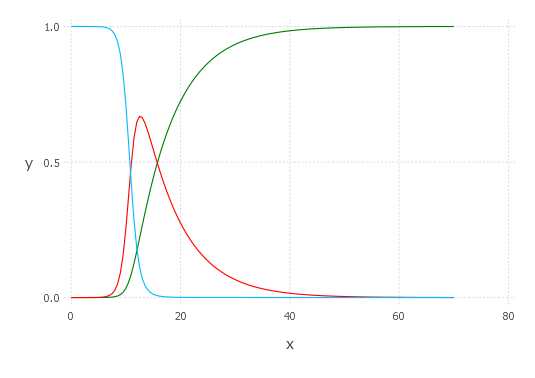

In [6]:
plot(
layer(x = sol.x, y = sol.y[:, 1], Geom.line),
layer(x = sol.x, y = sol.y[:, 2], Geom.line, Theme(default_color = colorant"red")),
layer(x = sol.x, y = sol.y[:, 3], Geom.line, Theme(default_color = colorant"green"))
)